#### autoreload modules and utilities

In [1]:
%load_ext autoreload
%autoreload 2

#### import all neceesary libraries/packages

In [2]:
import joblib

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 

from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#### Utility functions

In [3]:
## utilities
from utils import clean_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\christian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\christian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load Data

In [4]:
data = pd.read_csv('imdb_labelled.txt', sep='\t', names=['review', 'label'])

In [5]:
data.head(3)

,review,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0


In [6]:
data.iloc[0]['review']

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

### Create Label (Positive/Negative)

In [7]:
data['sentiment'] = data["label"].apply(lambda x: "positive" if x else "negative")
data.head()

,review,label,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0,negative
1,Not sure who was more lost - the flat characte...,0,negative
2,Attempting artiness with black & white and cle...,0,negative
3,Very little music or anything to speak of.,0,negative
4,The best scene in the movie was when Gerardo i...,1,positive


### Missing values

In [8]:
data.isnull().sum()

review       0
label        0
sentiment    0
dtype: int64

###### We check for the sum of missing values if their exist any to start with.

### Label Frequency

positive    386
negative    362
Name: sentiment, dtype: int64



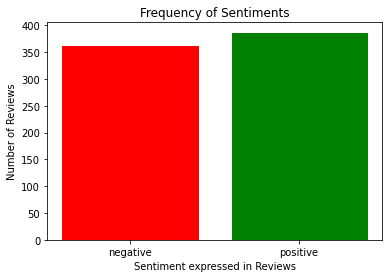

In [9]:
Index = [1, 0]

print(data["sentiment"].value_counts())
print()

barlist = plt.bar(Index, data["sentiment"].value_counts())

plt.title("Frequency of Sentiments")
plt.xticks(Index, ['positive', 'negative'])
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')

barlist[Index[1]].set_color('green')
barlist[Index[0]].set_color('red')
plt.show()

The Dataset labels seems to be balanced, there will be no need for any under/over sampling

# Clean Data

In [10]:
data['clean_review'] = data["review"].apply(clean_text)
data.head()

,review,label,sentiment,clean_review
0,"A very, very, very slow-moving, aimless movie ...",0,negative,a very very very slowmoving aimless movie abou...
1,Not sure who was more lost - the flat characte...,0,negative,not sure who wa more lost the flat character o...
2,Attempting artiness with black & white and cle...,0,negative,attempting artiness with black white and cleve...
3,Very little music or anything to speak of.,0,negative,very little music or anything to speak of
4,The best scene in the movie was when Gerardo i...,1,positive,the best scene in the movie wa when gerardo is...


## Text preprocessing

#### observe Count vectorizer

In [11]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(data["clean_review"])
cv_dataframe = pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())

cv_dataframe.head()

,010,10,1010,110,12,15,18th,1928,1947,1948,...,younger,youre,youthful,youtube,youve,yun,zillion,zombie,zombiestudents,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### observe tfidf vectorizer

In [12]:
tf_idf_vec = TfidfVectorizer(stop_words='english')

tf_idf_data = tf_idf_vec.fit_transform(data["clean_review"])
tf_idf_dataframe = pd.DataFrame(tf_idf_data.toarray(), columns=tf_idf_vec.get_feature_names())
tf_idf_dataframe.head()

,010,10,1010,110,12,15,18th,1928,1947,1948,...,younger,youre,youthful,youtube,youve,yun,zillion,zombie,zombiestudents,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### What CountVectorizer and Vectorizers do is to split the sentences into words, count the number of occurences of each word which is called bag of word model, the higher the frequency of a word really means its not so important or close to irrelevance, therefore the inverse logarithm is been carried out, with the result, you can easily deduce that the closer the value is towards 0 the less relevant it is. They are a very useful preprocessing tool used for text classification model.

In [13]:
X = data["clean_review"]
y = data['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

###### This is where we split the dataset in preparation for the training using a sklearn module named train_test_split, reviews ia what we are using to make predictions therefore it is our feature in this case and scores of the reviews is our target variable, what we are predicting.

In [14]:
print(f"train shape input:{x_train.shape}, output:{y_train.shape}")
print(f"test shape  input:{x_test.shape}, output:{y_test.shape}")

train shape input:(598,), output:(598,)
test shape  input:(150,), output:(150,)


## Train with CountVactorizer and Multinomial NB

#### initilize pipeline with countvectorizer

In [15]:
cv_NB = Pipeline([
    ('bow', CountVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())
])

In [16]:
cv_NB.fit(x_train, y_train)

Pipeline(steps=[('bow', CountVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [17]:
joblib.dump(cv_NB, "models/multinomial_naive_bayes_with_count_vectorizer.joblib")

['models/multinomial_naive_bayes_with_count_vectorizer.joblib']

In [18]:
y_pred = cv_NB.predict(x_test) #predict testing data

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        80
           1       0.75      0.79      0.77        70

    accuracy                           0.78       150
   macro avg       0.78      0.78      0.78       150
weighted avg       0.78      0.78      0.78       150



### Running Cross validation with Countvectorizer and MultinomialNB

In [19]:
accuracy = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=100) 
skf.get_n_splits(X, y) 

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    cv_NB.fit(x_train_fold, y_train_fold)
    result = cv_NB.score(x_test_fold, y_test_fold)
    accuracy.append(result)

accuracy = np.array(accuracy)

# Print the output
print('List of first 10 possible accuracy:')
for index, acc in enumerate(accuracy[:10]):
    print(f"{index+1:3d}. {acc:.4f}")

print('\nMetrics that were obtained from this model:')
print(f' Maximum Accuracy:   {accuracy.max()*100:.2f}%') 
print(f' Minimum Accuracy:   {accuracy.min()*100:.2f}%') 
print(f' Mean Accuracy:   {accuracy.mean()*100:.2f}%') 
print(f' Standard Deviation: {accuracy.std():.4f}')

List of first 10 possible accuracy:
  1. 0.7333
  2. 0.7600
  3. 0.7200
  4. 0.7467
  5. 0.7467
  6. 0.7333
  7. 0.8133
  8. 0.7200
  9. 0.7432
 10. 0.7568

Metrics that were obtained from this model:
 Maximum Accuracy:   81.33%
 Minimum Accuracy:   72.00%
 Mean Accuracy:   74.73%
 Standard Deviation: 0.0255


## Train with TfidfVector and Multinomial NB

#### initilize pipeline with tfidf vectorizer

In [20]:
tfidf_NB = Pipeline([
    ('bow', TfidfVectorizer(stop_words='english')),
    ('classifier',MultinomialNB())
])

In [21]:
tfidf_NB.fit(x_train, y_train)

Pipeline(steps=[('bow', TfidfVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [22]:
joblib.dump(tfidf_NB, "models/multinomial_naive_bayes_with_tfidf_vectorizer.joblib")

['models/multinomial_naive_bayes_with_tfidf_vectorizer.joblib']

In [23]:
y_pred = tfidf_NB.predict(x_test) #predict testing data

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77        80
           1       0.71      0.89      0.79        70

    accuracy                           0.78       150
   macro avg       0.79      0.79      0.78       150
weighted avg       0.80      0.78      0.78       150



In [24]:
### Running Cross validation with TfidfvVectorizer and MultinomialNB

In [25]:
accuracy = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=100) 
skf.get_n_splits(X, y) 

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    tfidf_NB.fit(x_train_fold, y_train_fold)
    result = tfidf_NB.score(x_test_fold, y_test_fold)
    accuracy.append(result)

accuracy = np.array(accuracy)

# Print the output
print('List of first 10 possible accuracy:')
for index, acc in enumerate(accuracy[:10]):
    print(f"{index+1:3d}. {acc:.4f}")

print('\nMetrics that were obtained from this model:')
print(f' Maximum Accuracy:   {accuracy.max()*100:.2f}%') 
print(f' Minimum Accuracy:   {accuracy.min()*100:.2f}%') 
print(f' Mean Accuracy:   {accuracy.mean()*100:.2f}%') 
print(f' Standard Deviation: {accuracy.std():.4f}')

List of first 10 possible accuracy:
  1. 0.7467
  2. 0.7867
  3. 0.6800
  4. 0.7467
  5. 0.8000
  6. 0.7867
  7. 0.8533
  8. 0.7867
  9. 0.7568
 10. 0.7568

Metrics that were obtained from this model:
 Maximum Accuracy:   85.33%
 Minimum Accuracy:   68.00%
 Mean Accuracy:   77.00%
 Standard Deviation: 0.0427
